<a href="https://colab.research.google.com/github/amjadraza/learn-ml-with-spark/blob/main/RUN_SPARK_CONNECT_IN_GOOGLE_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Run Spark Connect Available in Apache Spark 3.4 on Google Colab](https://spark.apache.org/docs/3.4.0/spark-overview)


This is the working google collaboratory notebook example of setting up  recently release spark 3.4.0 in google colab and using Spark Connect API to create Spark Sessions Remotely. Spark connect is part of Spark 3.4.0 release and solved manay problems.This blog post will focus on below learning objectives.

* Installing Java in the Google Colaboratory
* Setting up Spark 3.4.0 in the Google Colaboratory
* Setting up Spark Connect on Google Collaboratory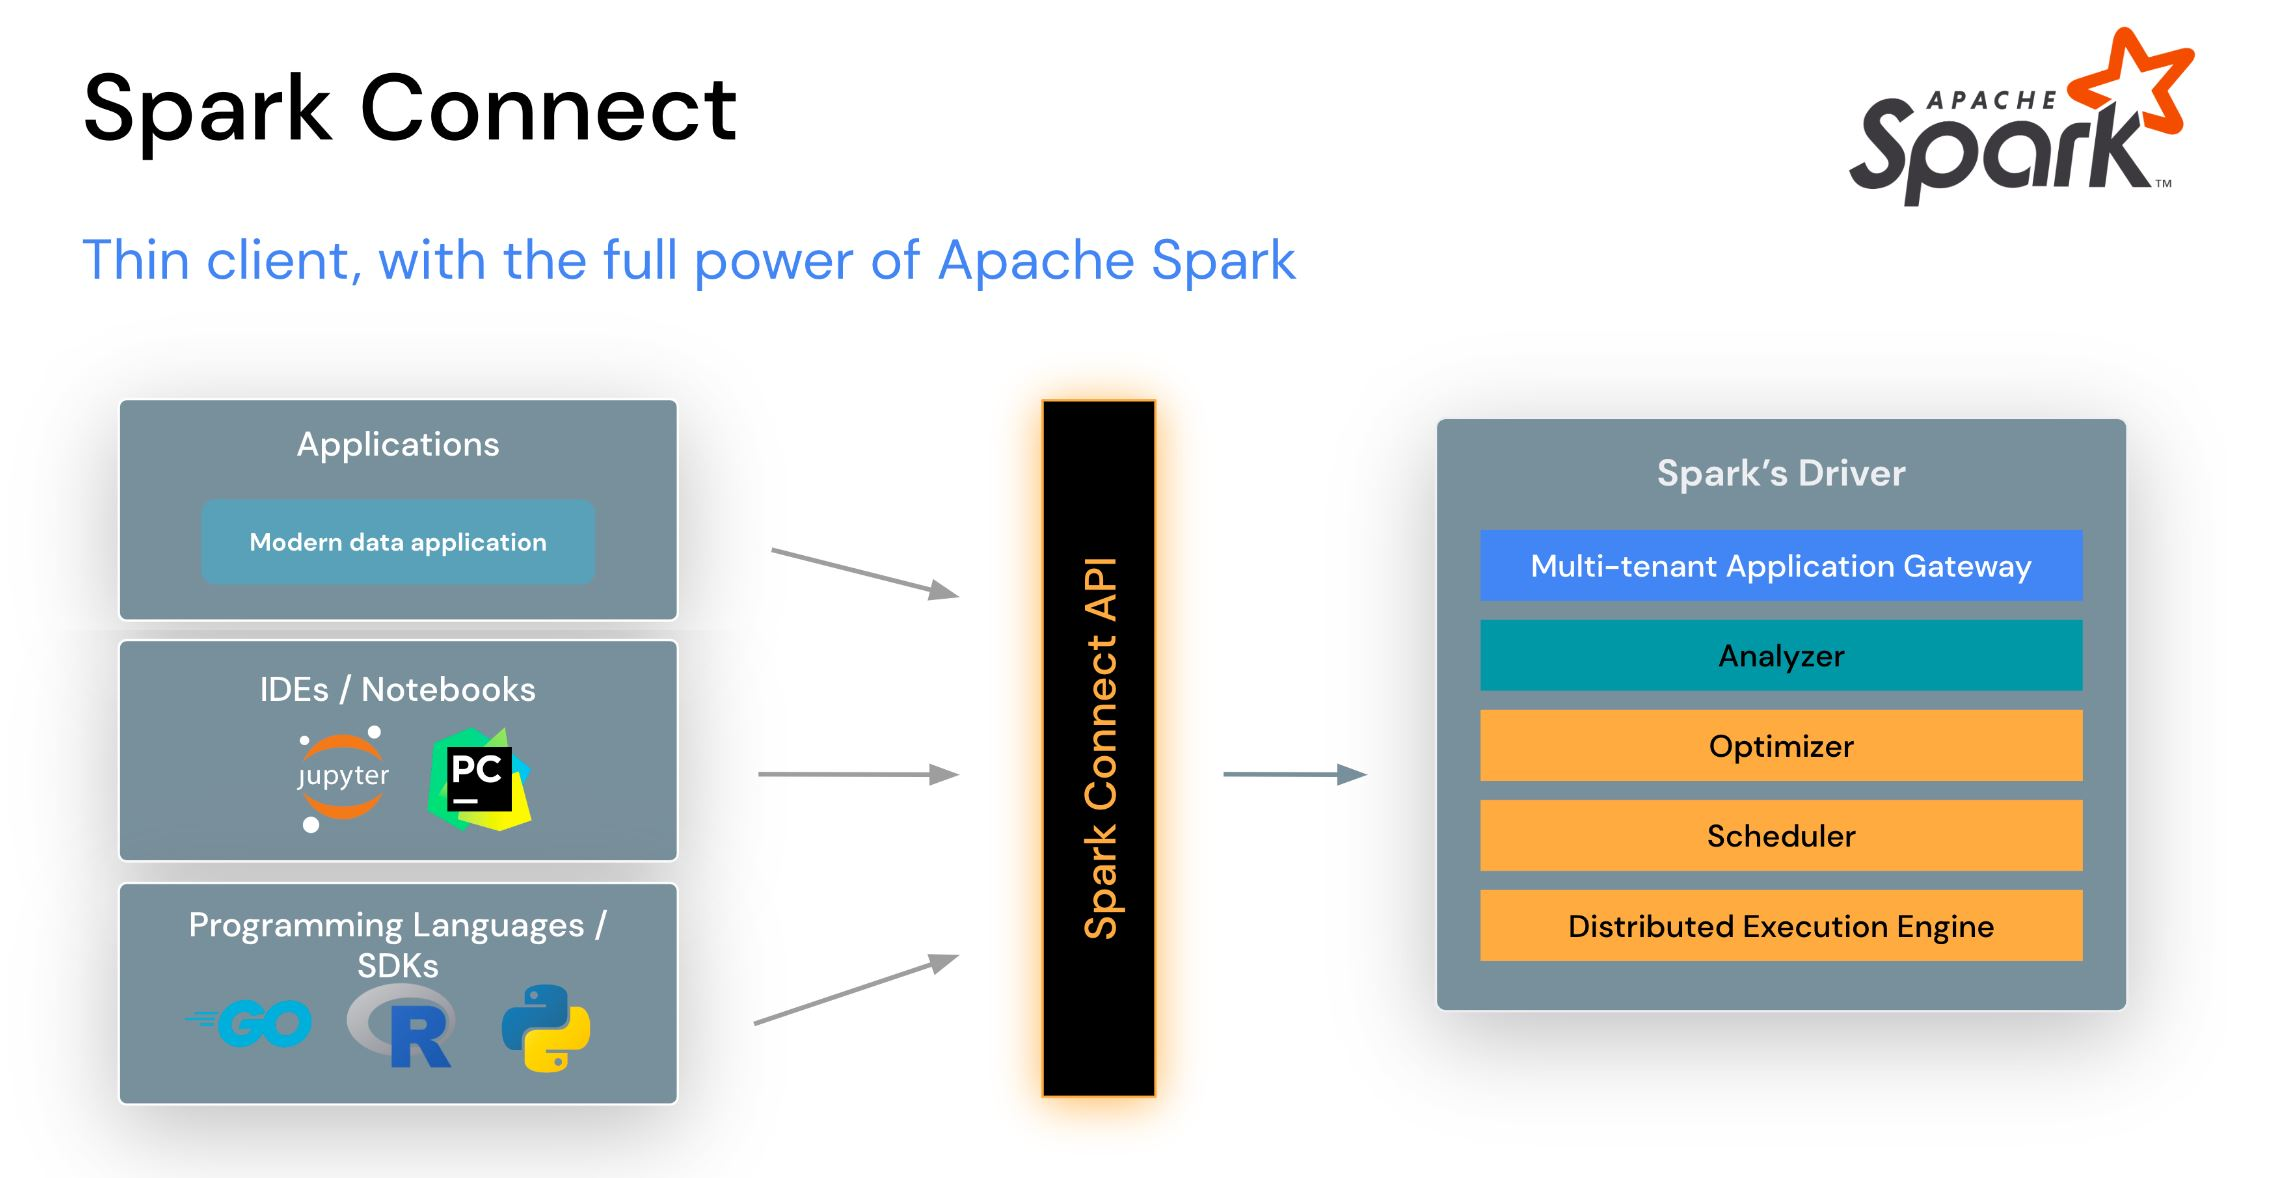




# What is SPARK CONNECT

Spark Connect  decouples client-server architecture and allows remote connectivity to Spark clusters from any application, regardless of location. By separating the client and server, this architecture empowers modern data applications, IDEs, Notebooks, and programming languages to interactively access Spark. Debugging on Spark Cluster (Development, Staging) was not as seamless as we get do in IDEs or Notebooks, with the release of Spark Connect, it made easy. Followings are the key problems solved by Spark Connect.

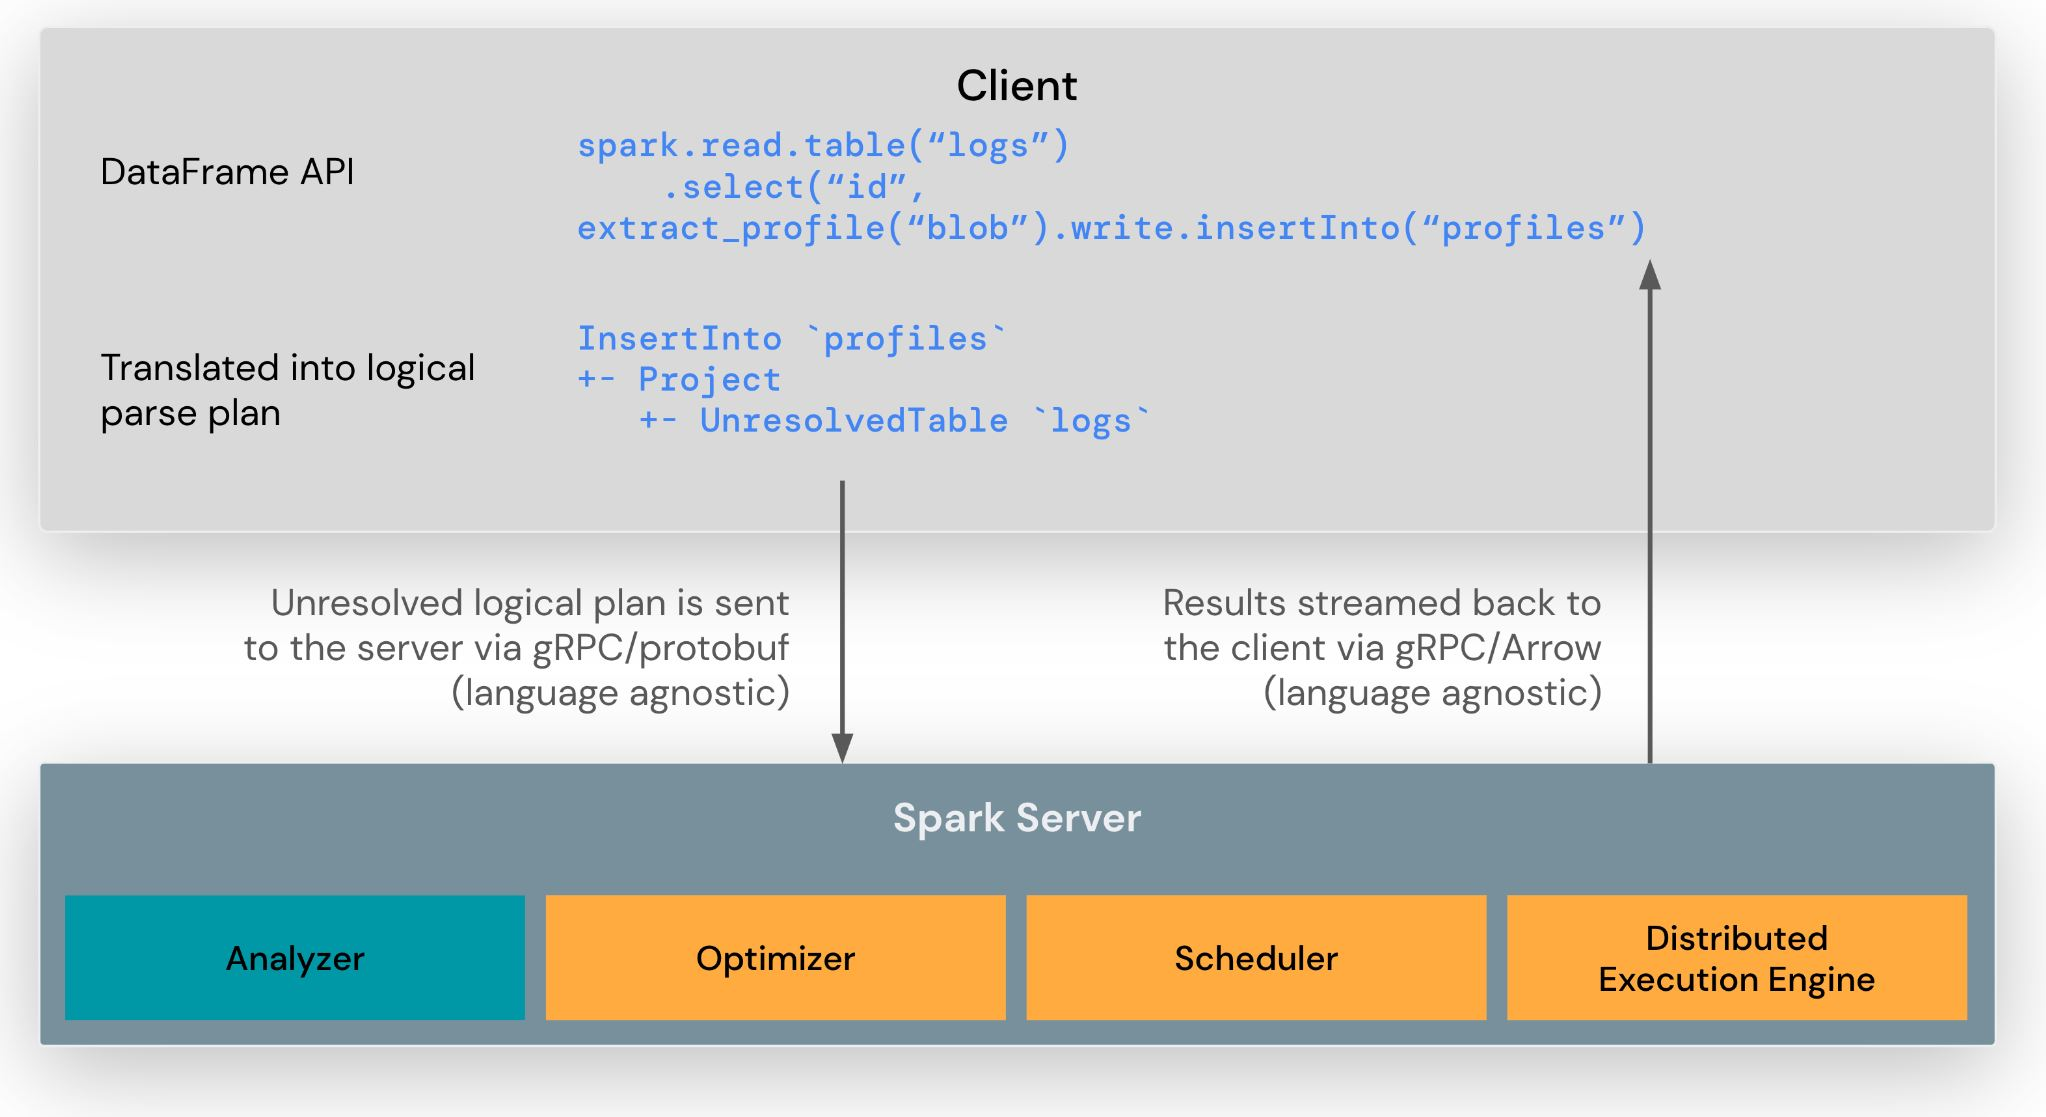

# Stability, Upgrades, Debugging, and Observability Improvements By Spark Connect

Spark Connect helps solve Stability, Debugging, Upgrades and Observability problems being faced by Spark Developers. 

**Stability** : With the release of Spark Connect, applications that consume excessive memory will only affect their own environment since they can execute in their individual processes. Users have the freedom to specify their own dependencies on the client and need not concern themselves with any potential conflicts that might arise with the Spark driver.

**Upgrades & ENV Conflicts** Independent upgrading of the Spark driver is now possible, allowing for performance enhancements and security fixes to be easily implemented. As a result, applications can remain forward-compatible as long as the server-side RPC definitions are backward-compatible. We do not need to upgrade applications at once due to compatibility issues.

**Debugging & Obseravailibity** With Spark Connect, developers can conduct interactive debugging from their preferred IDE during the development process. Likewise, applications can be monitored using the native metrics and logging libraries of their framework.


# Setting up Spark 3.4.0 in the Google Colaboratory

This notebook comprises the instructions to run Sprak and pyspark in google colabboratory framework. 

We will be running the excises of  some basic functions on using koalas

We will install below programs

* Java 8
* spark-3.4.0
* Hadoop 3.2 
* [Findspark](https://github.com/minrk/findspark)


This installs Apache Spark 3.4.0, Java 8, and [Findspark](https://github.com/minrk/findspark), a library that makes it easy for Python to find Spark.

Run below set of commands to install spark. 

**Change the location/version of spark version of your choice**

**[Apache Spark in Google Collaboratory In 3 steps.](https://medium.com/@sushantgautam_930/apache-spark-in-google-collaboratory-in-3-steps-e0acbba654e6)**

> Make sure the spark-version you are downloading is availbale on target link



In [ ]:
# Run below commands
SPARK_VERSION = '3.4.0'
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz
!tar xf spark-3.4.0-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
!ls -a

.   .config	 spark-3.4.0-bin-hadoop3
..  sample_data  spark-3.4.0-bin-hadoop3.tgz


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"
os.environ["SPARK_VERSION"] = '3.4.0'

In [ ]:
import findspark
findspark.init()

## Spark Installation test : Traditional Way
Lets test the installation of spark in our google colab environment.

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark 
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])

df.show(3, False)


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



## Spark Installation test : SPARK CONNECT
Lets test the installation of spark in our google colab environment when running Spark Connect. 

In [ ]:
# Stopping regular Spark Session before trying the SPARK Connect Functionality
from pyspark.sql import SparkSession

SparkSession.builder.master("local[*]").getOrCreate().stop()

In [ ]:
# Start Spark Connect server by running below
!$SPARK_HOME/sbin/start-connect-server.sh --packages org.apache.spark:spark-connect_2.12:$SPARK_VERSION

In [ ]:
# Start Spark Session by Specifying the Spark Cluster Address. In our exacmple, we starting on local host.
spark = SparkSession.builder.remote("sc://localhost:15002").getOrCreate()

In [ ]:
from datetime import datetime, date
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [ ]:
spark.version

'3.4.0'

In [ ]:
# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.4.0


# Conclusions

In this notebook, we learned the recent release of Spark Connect with 3.4.0 release of Spark. Spark Connect is one the key features release with version 3.4.0. Using Spark Connect, we can run the applications on remote servers with better dependencie management, debugging and handle version conflicts. Also, we did learn below as hands-on. 

* Running spark 3.4.0 in Google Colab
* Running Spark Connect in Google Colab

Read through below articles for better understanding of Spark Connect and Spark 3.4.0.





**References:**

1. https://apache.osuosl.org/spark/spark-3.4.0/
2. https://medium.com/@sushantgautam_930/apache-spark-in-google-collaboratory-in-3-steps-e0acbba654e6
3. https://notebooks.gesis.org/binder/jupyter/user/databricks-koalas-kuv5qckt/notebooks/docs/source/getting_started/10min.ipynb
4. https://medium.com/@amjadraza24/getting-started-spark3-0-0-with-google-colab-9796d350d78
5. https://www.databricks.com/blog/2023/04/18/spark-connect-available-apache-spark.html
6. https://spark.apache.org/docs/latest/spark-connect-overview.html
7. https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_connect.html